In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/Customer Churn/customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/Customer Churn/customer_churn_dataset-testing-master.csv')

In [4]:
df_train.shape, df_test.shape

((440833, 12), (64374, 12))

In [5]:
df = df_train.merge(df_test, how='outer')

In [6]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
2,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
3,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
4,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [7]:
df.shape

(505207, 12)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [10]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [11]:
df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [12]:
df.dropna(inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.drop('CustomerID', axis=1, inplace=True)

In [15]:
df['Churn'].value_counts()

,count
Churn,
1.0,280492
0.0,224714


In [16]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colname1 = []
for i in df.columns:
  if (df[i].dtype == 'object'):
    df[i] = le.fit_transform(df[i])
    colname1.append(i)

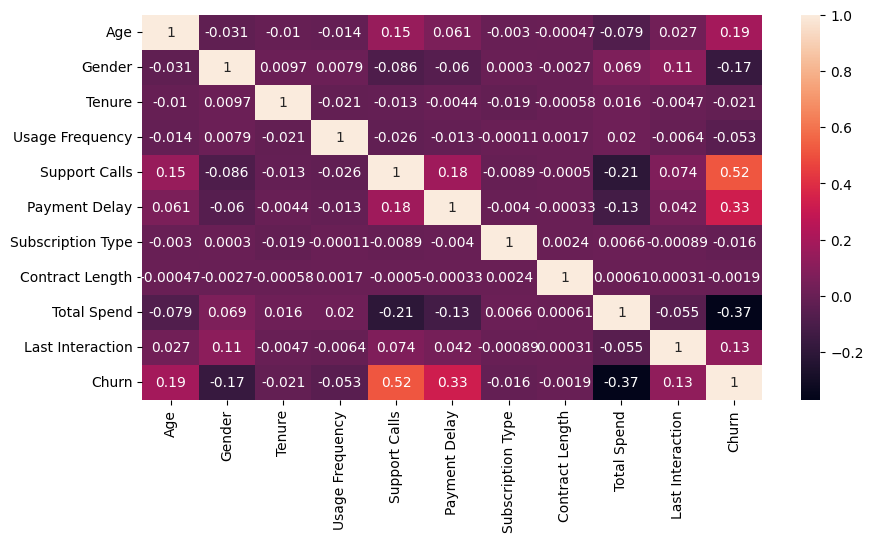

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8899 - loss: 0.3014 - val_accuracy: 0.9251 - val_loss: 0.2249
Epoch 2/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9271 - loss: 0.2200 - val_accuracy: 0.9301 - val_loss: 0.2135
Epoch 3/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9308 - loss: 0.2094 - val_accuracy: 0.9306 - val_loss: 0.2068
Epoch 4/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9310 - loss: 0.2069 - val_accuracy: 0.9310 - val_loss: 0.2057
Epoch 5/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9325 - loss: 0.2013 - val_accuracy: 0.9324 - val_loss: 0.2002
Epoch 6/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9325 - loss: 0.1991 - val_accuracy: 0.9323 - val_loss: 0.1991
Epoch 7/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9336 - loss: 0.1952 - val_accuracy: 0.9327 - val_loss: 0.1965
Epoch 8/10
10105/10105 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

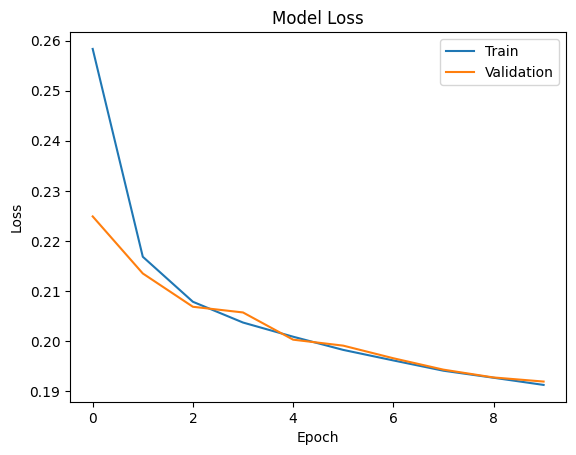

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [28]:
model.evaluate(X_test, y_test)

3158/3158 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9338 - loss: 0.1899


[0.18958398699760437, 0.9338690638542175]

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

3158/3158 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
[[38658  6400]
 [  282 55702]]
0.9338690841432276
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     45058
         1.0       0.90      0.99      0.94     55984

    accuracy                           0.93    101042
   macro avg       0.94      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042

